In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
training_set = pd.read_csv('../Dataset/training_set.csv', sep=';')
testing_set = pd.read_csv('../Dataset/testing_set.csv', sep=';')

In [3]:
# X_train = training_set.drop(['y'], axis=1)
# y_train = training_set['y']

# X_test = testing_set.drop(['y'], axis=1)
# y_test = testing_set['y']

In [4]:
# Use the powertransformer to transform features and the target should be divided by the max value of the target
from sklearn.preprocessing import PowerTransformer

X = pd.concat([training_set.drop(['y'], axis=1), testing_set.drop(['y'], axis=1)])
y = pd.concat([training_set['y'], testing_set['y']])

X_train = X[:training_set.shape[0]]
X_test = X[training_set.shape[0]:]
y_train = y[:training_set.shape[0]]
y_test = y[training_set.shape[0]:]

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

y_max = y.max()
y_train = y_train / y_max
y_test = y_test / y_max

/home/hugo/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean Squared Error: 0.00002976
Mean Absolute Error: 0.00142745
R2 Score(Train): 0.95808652
R2 Score(Test): 0.93429551


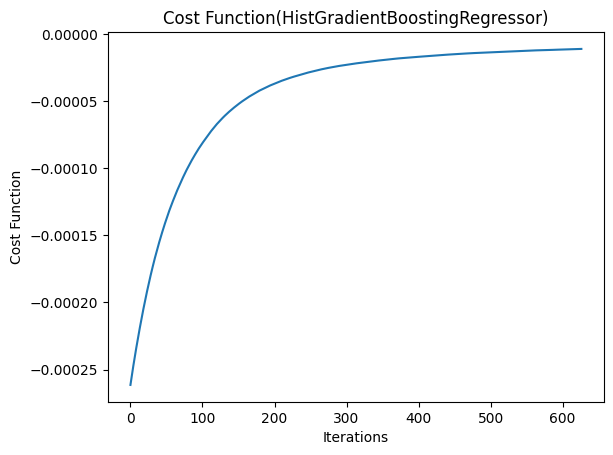

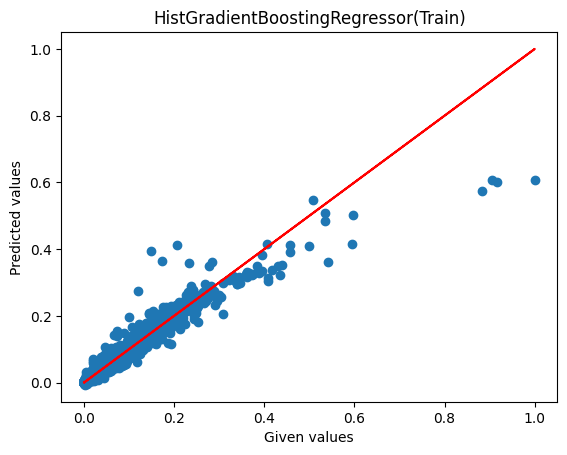

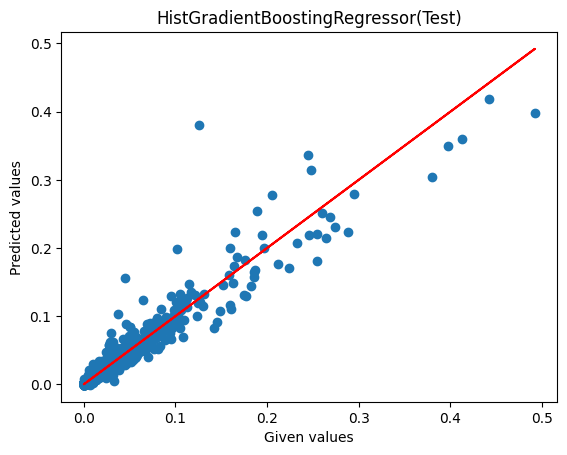

In [5]:
# Build a HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=100000, learning_rate=0.01, max_depth=100, min_samples_leaf=20, max_leaf_nodes=40)
hgb.fit(X_train, y_train)
# Predict the test set results
y_pred = hgb.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Squared Error: %.8f' % mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %.8f' % mean_absolute_error(y_test, y_pred))
print('R2 Score(Train): %.8f' % r2_score(y_train, hgb.predict(X_train)))
print('R2 Score(Test): %.8f' % r2_score(y_test, y_pred))

# Plot the cost function
plt.plot(hgb.train_score_)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function(HistGradientBoostingRegressor)')
plt.show()

# Plot accuracy of the model (given values on the x and predicted values on the y)
plt.scatter(y_train, hgb.predict(X_train))
plt.plot(y_train, y_train, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('HistGradientBoostingRegressor(Train)')
plt.show()

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('HistGradientBoostingRegressor(Test)')
plt.show()

In [6]:
# Build a Suppor Vector Machine for regression
from sklearn.svm import SVR
from math import log

num_features = X_train.shape[1]
num_features = log(num_features)
svr = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.01, verbose=True)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)


# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score for train: %.8f" % r2_score(y_train, svr.predict(X_train)))
print("R2 score for test: %.8f" % r2_score(y_test, y_pred))

# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(y_train, svr.predict(X_train), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, svr.predict(X_train)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, svr.predict(X_train)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, svr.predict(X_train)))
axs[0].legend(handles=[lin1, lin2, lin3])
axs[0].set_title('Support Vector Machine (Training set)')
axs[1].scatter(y_test, y_pred, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred))
axs[1].legend(handles=[lin1, lin2, lin3])
axs[1].set_title('Support Vector Machine (Testing set)')
plt.show()

In [7]:
# # save the model to disk
# import pickle

# filename = 'SVR_model.sav'
# pickle.dump(svr, open(filename, 'wb'))

In [8]:
# Plot the residuals
plt.scatter(svr.predict(X_train), svr.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(svr.predict(X_test), svr.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=1)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

Mean squared error: 0.00007035
Mean absolute error: 0.00221927
Root mean squared error: 0.00838739
R2 score(for train): 1.00000000
R2 score(for test): 0.84470611


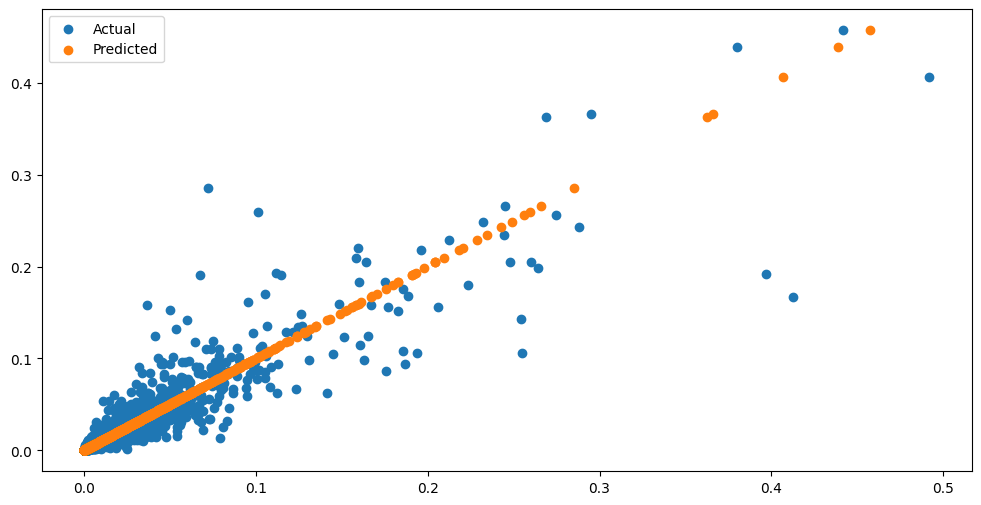

In [9]:
# Build a Decision Tree for regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=40)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score(for train): %.8f" % r2_score(y_train, tree.predict(X_train)))
print("R2 score(for test): %.8f" % r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Actual')
plt.scatter(y_pred, y_pred, label='Predicted')
plt.legend()
plt.show()

Mean squared error: 0.00003395
Mean absolute error: 0.00134859
Root mean squared error: 0.00582705
R2 score(for train): 0.98887955
R2 score(for test): 0.92504538


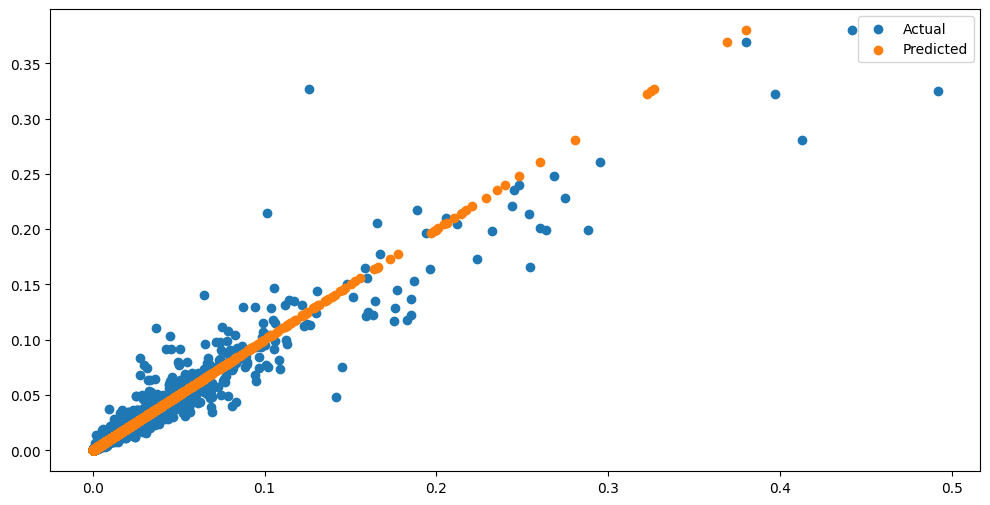

In [10]:
# Build a random forest for regression
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200, max_depth=40)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score(for train): %.8f" % r2_score(y_train, forest.predict(X_train)))
print("R2 score(for test): %.8f" % r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Actual')
plt.scatter(y_pred, y_pred, label='Predicted')
plt.legend()
plt.show()